### Predict Loan Eligibility for Dream Housing Finance company

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 



#### Business Case:-To find out based on given features whether the loan will get approved or not

In [1]:
##importing the libraries
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## loading the data
train=pd.read_csv('train_ctrUa4K.csv')
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
test=pd.read_csv('test_lAUu6dG.csv')
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [4]:
train_original=train.copy()
test_original=test.copy()

In [5]:
train.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [6]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# Domain Analysis


### Variable	Description
*Loan_ID*	         :Unique Loan ID

*Gender*	         :Male/ Female

*Married*	         :Applicant married (Y/N)

*Dependents*	     :Number of dependents

*Education*	     :Applicant Education (Graduate/ Under Graduate)

*Self_Employed*	 :Self employed (Y/N)

*ApplicantIncome*	  :Applicant income

*CoapplicantIncome*	:Coapplicant income
A co-applicant refers to a person who applies along with the borrower for a loan. 

*LoanAmount*	       : Loan amount in thousands

*Loan_Amount_Term*	:Term of loan in months
Term loans are normally meant for established small businesses with sound financial statements.

*Credit_History*	   : credit history meets guidelines
 A consumer's credit history is a measure of their ability to repay debts and demonstrated responsibility in repaying debts.
 
*Property_Area*	    :Urban/ Semi Urban/ Rural

*Loan_Status*	      :  (Target) Loan approved (Y/N)

## Basic Checks

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB



Categorical features:'Gender','Married','Self_Employed','Credit_History','Loan_Status'

Ordinal features:'Dependents', 'Education', 'Property_Area'

Numerical features'ApplicantIncome', 'CoapplicantIncome','LoanAmount',
       'Loan_Amount_Term'

In [9]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [11]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [13]:
test.nunique()

Loan_ID              367
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      314
CoapplicantIncome    194
LoanAmount           144
Loan_Amount_Term      12
Credit_History         2
Property_Area          3
dtype: int64

In [14]:
train.isnull().sum()#missing value

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [16]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [17]:
#insert loan_status in test and impute with Y

In [18]:
#test.insert(12, 'Loan_Status','Y')

In [19]:
df=pd.concat([train,test]).reset_index()

In [20]:
df

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,NaN
977,363,LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,NaN
978,364,LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,NaN
979,365,LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,NaN


In [21]:
df.head()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [22]:
#combine traintest data because missing values
#df = pd.concat([test.assign(ind="test"), train.assign(ind="train")])

## Exploratory Data Analysis

### Univariate Analysis

In [23]:
import sweetviz as sv
my_report = sv.analyze(train)## pass the original dataframe
my_report.show_html()


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


We can say,

More applicants are male,married,less dependents,higher education ,not self-employed,loan tern amount is 360,credit history meet guideliness,own property in semiurban area,income less than 9k and borrowed 170k.The authority has higher rate of approved loan 

### Bivariate or Multivariate Analysis

In [24]:
d1=df[['CoapplicantIncome', 'LoanAmount','Loan_Amount_Term','Credit_History','ApplicantIncome']]

C:\Users\Emmal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Emmal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Emmal\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

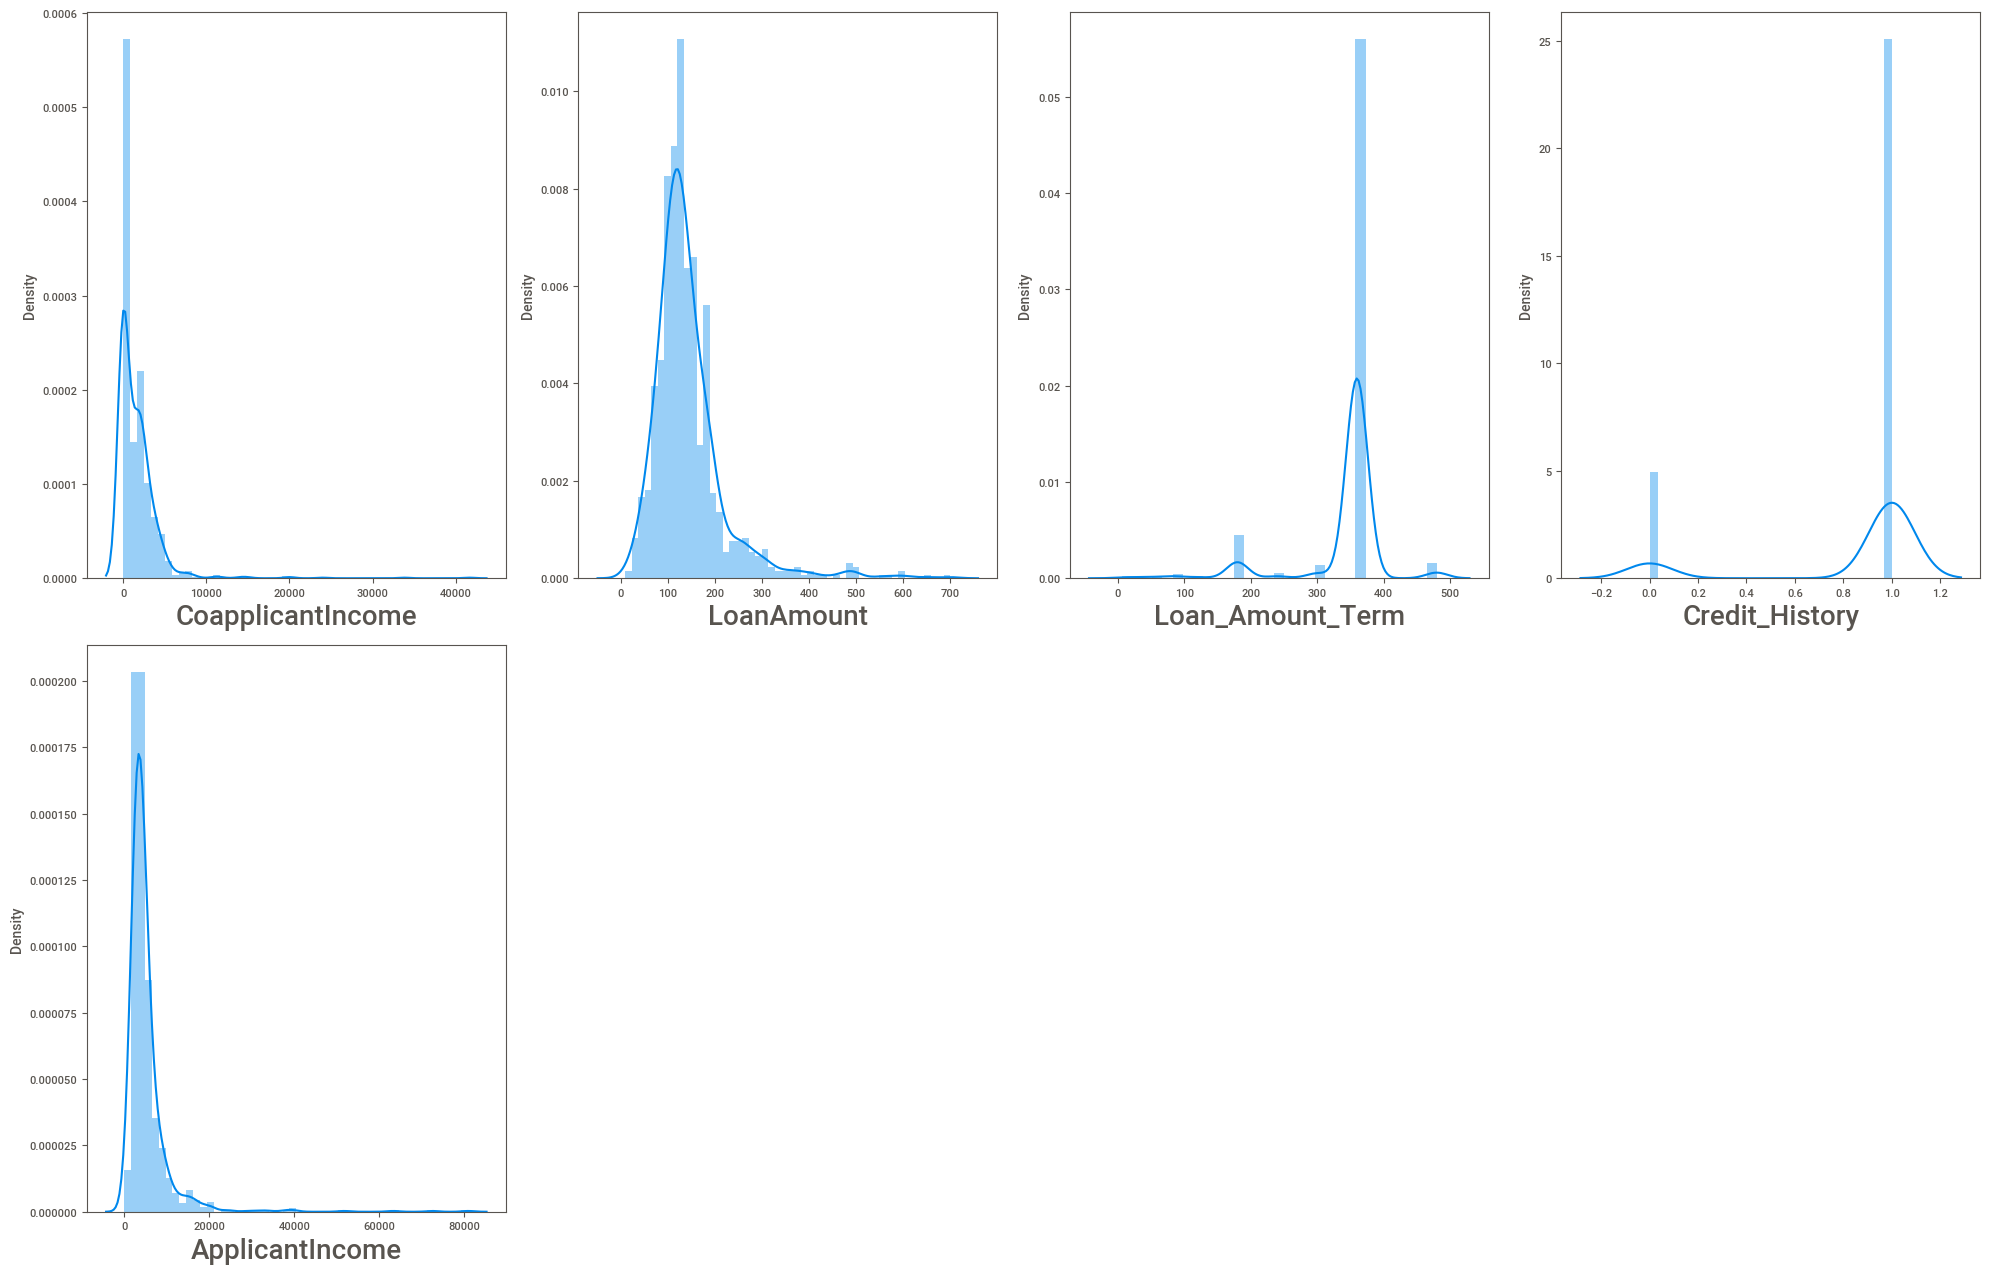

In [25]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in d1:
    if plotnumber<=16 :   ## as there is 16 columns
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(x=d1[column].dropna(axis=0))
                        #,y=train.Loan_Status)
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Loan Status',fontsize=20)
    plotnumber+=1
plt.tight_layout()

These features are asymmetrical 

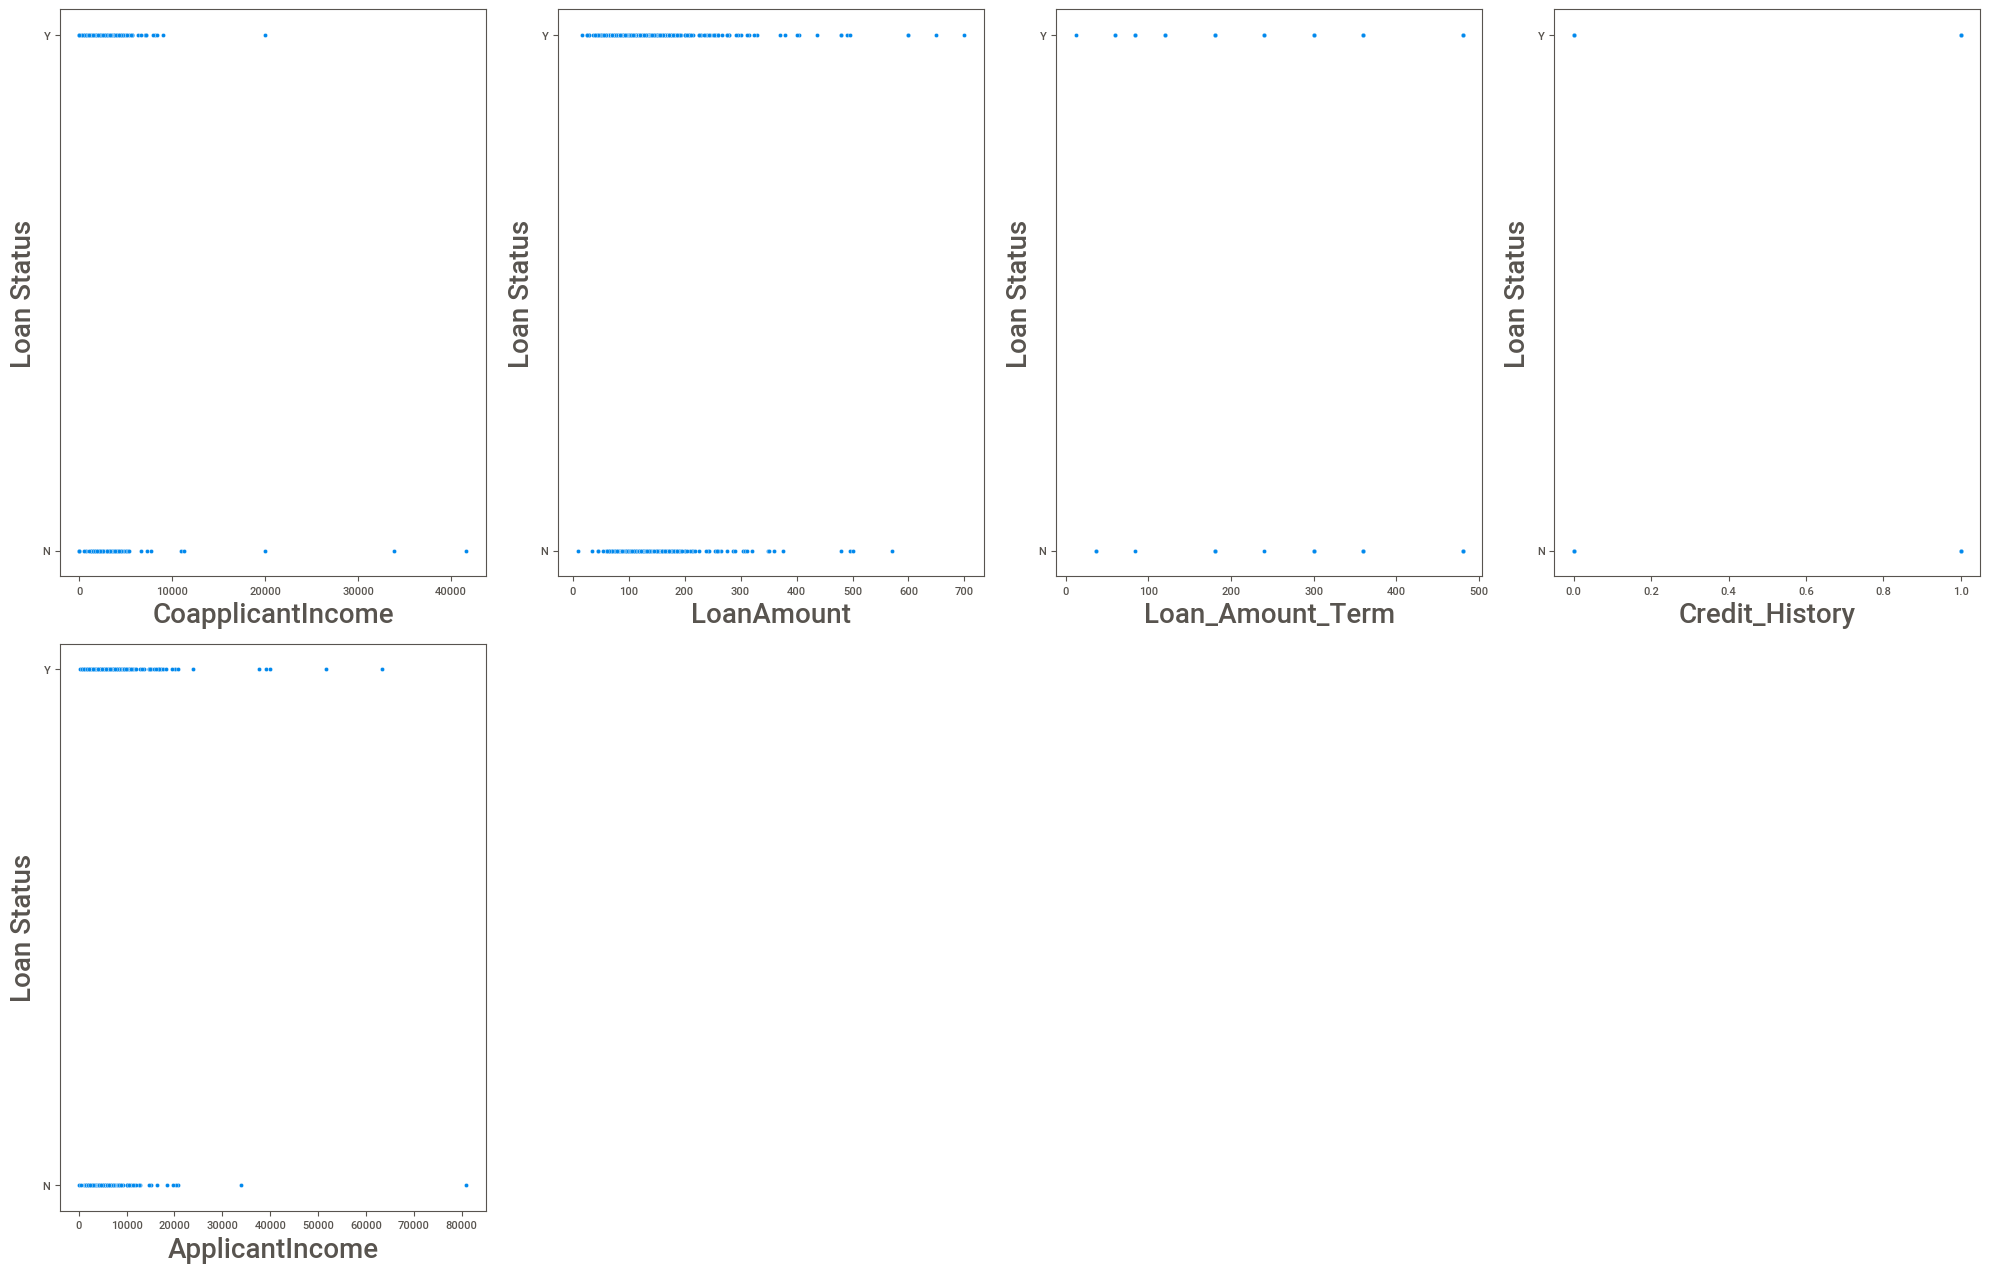

In [26]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in d1:
    if plotnumber<=16 :   ## as there is 16 columns
        ax = plt.subplot(4,4,plotnumber)
        sns.scatterplot(x=d1[column].dropna(axis=0)
                        ,y=df.Loan_Status)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Loan Status',fontsize=20)
    plotnumber+=1
plt.tight_layout()


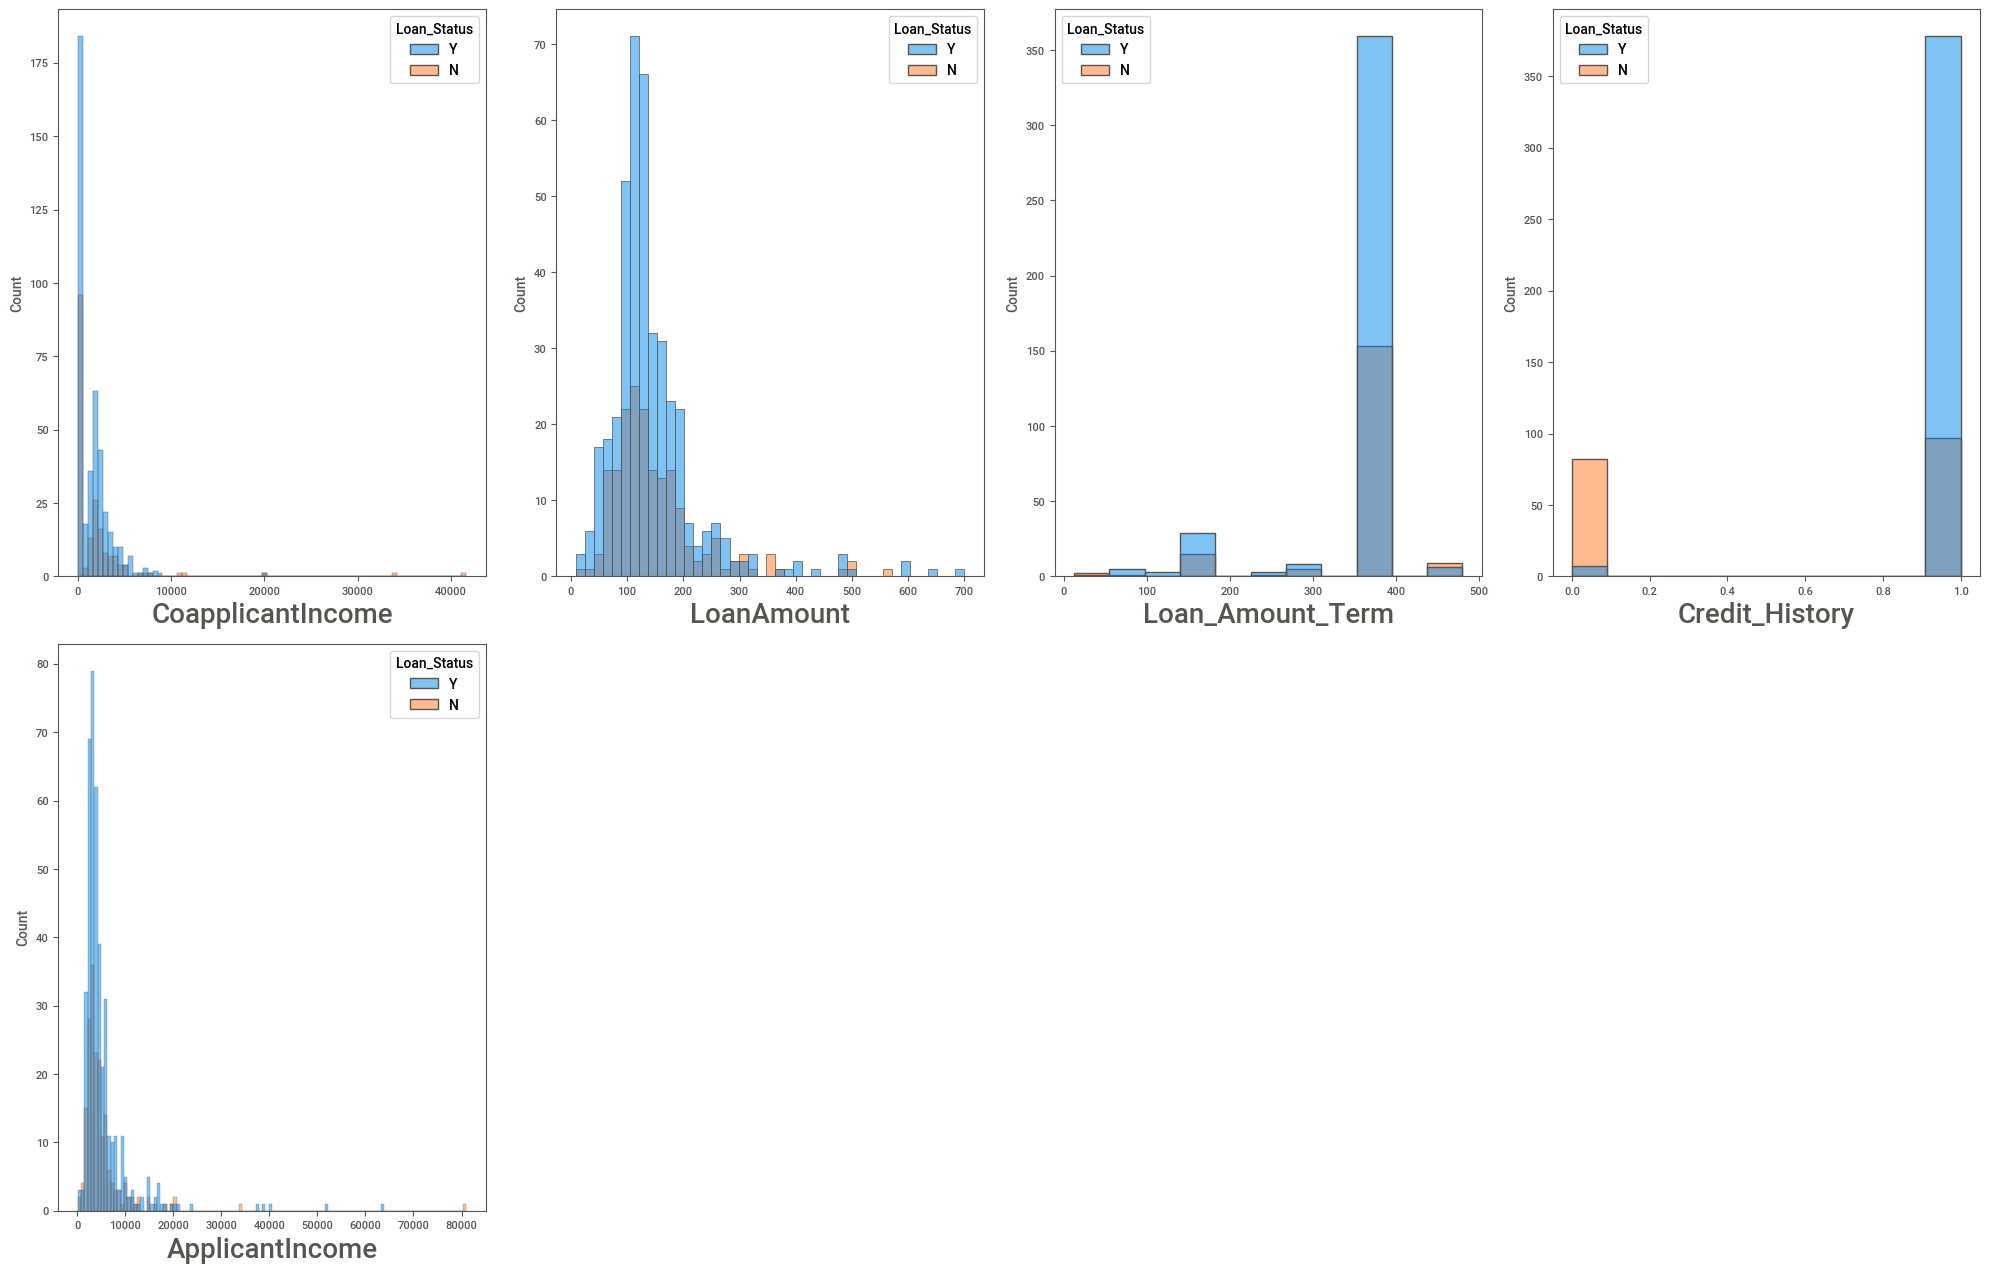

In [27]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in d1:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(x=d1[column],hue=df.Loan_Status)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


People whose credit history meet gudeliness,term loan amount 360(have higher financial statement),less income and borrowed less loan amount have highest amount of getting approved loan .


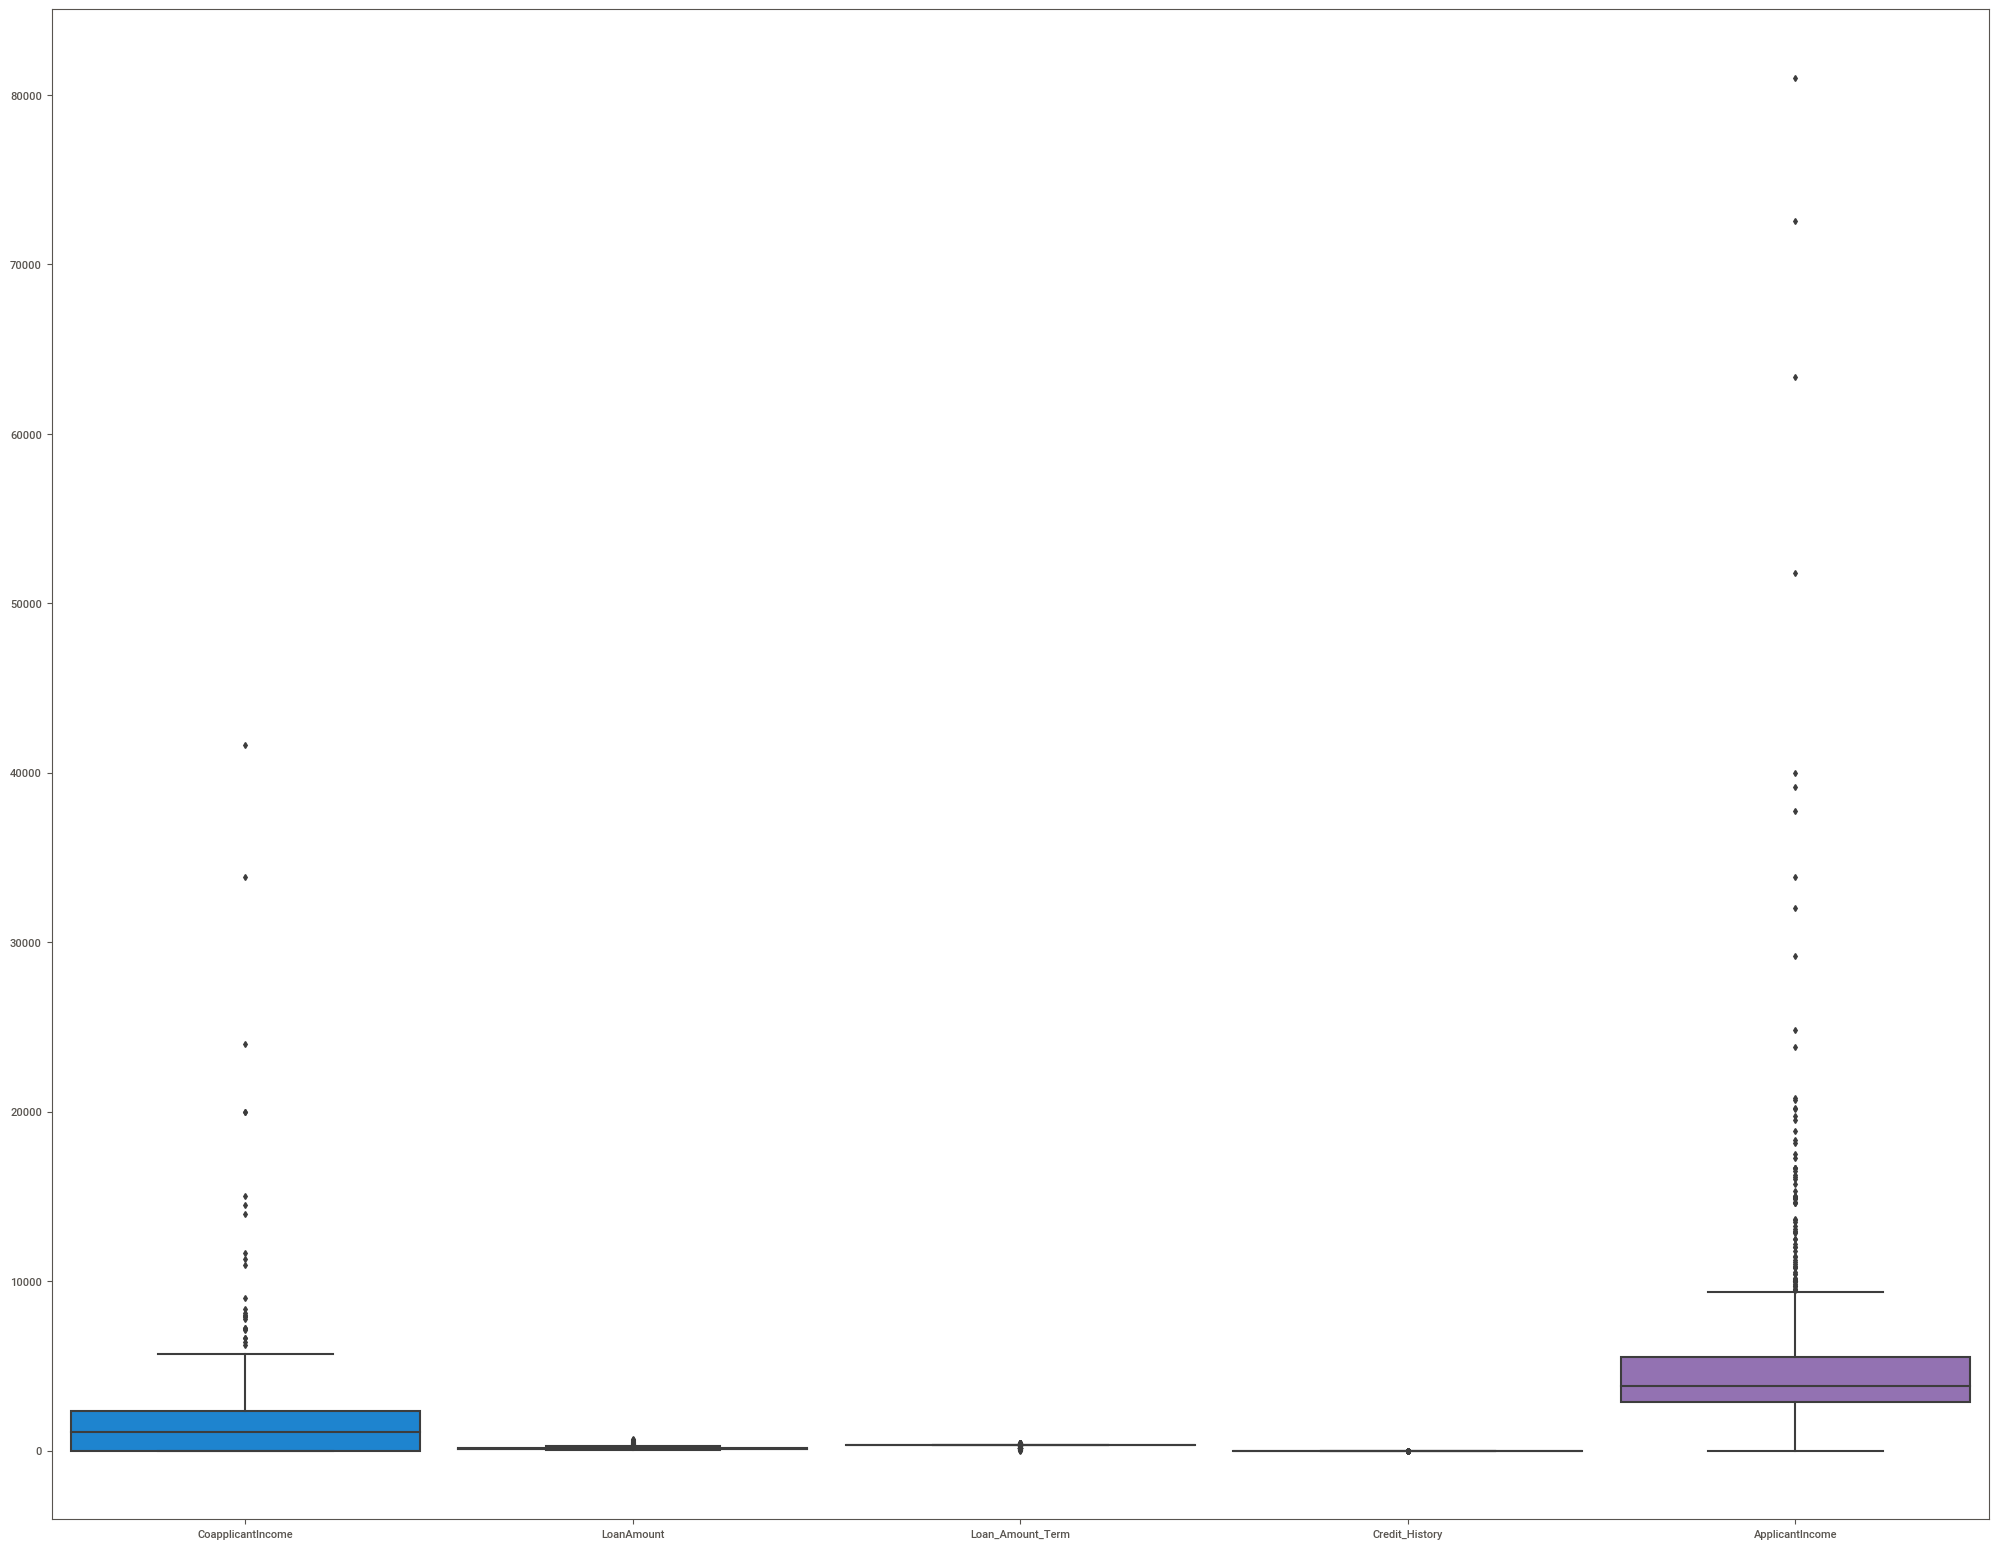

In [28]:
fig, ax = plt.subplots(figsize=(25,20))
sns.boxplot(data=d1, width= 0.9,ax=ax,  fliersize=3)
plt.show()

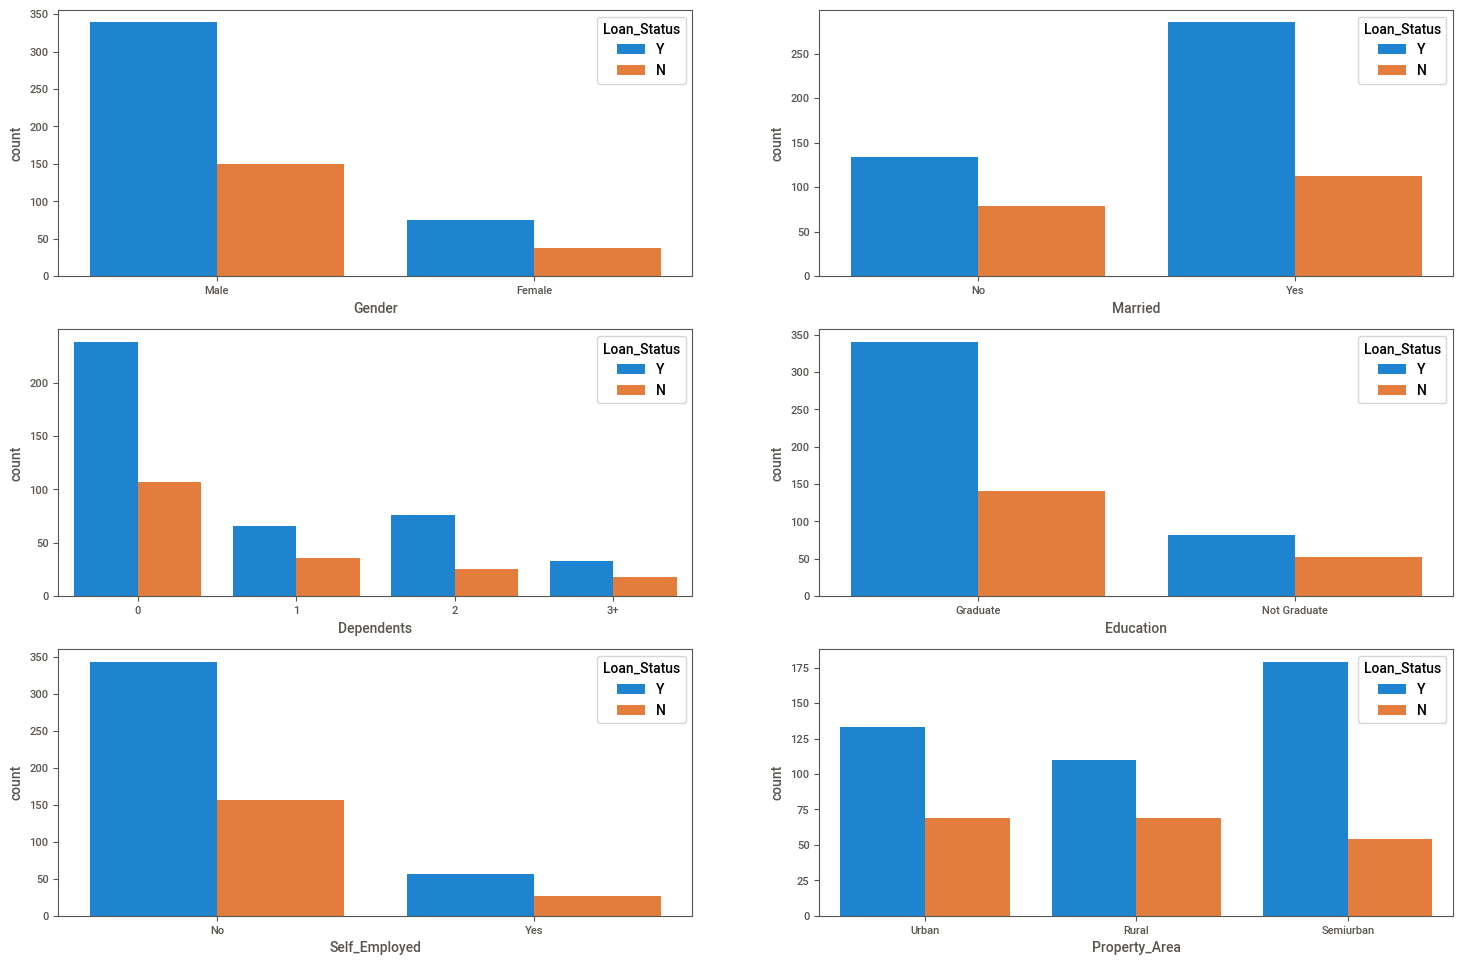

In [29]:
categorical= ['Gender', 'Married', 'Dependents', 'Education',
               'Self_Employed','Property_Area']
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))
for col, ax in zip(categorical[0:], axs.ravel()):
    sns.countplot(x=col, data=df, ax=ax,hue=df.Loan_Status)

Male,people who married ,less dependent,higher education, own property in semiurban area  and not self_employed  have higher chances to get loan approved.


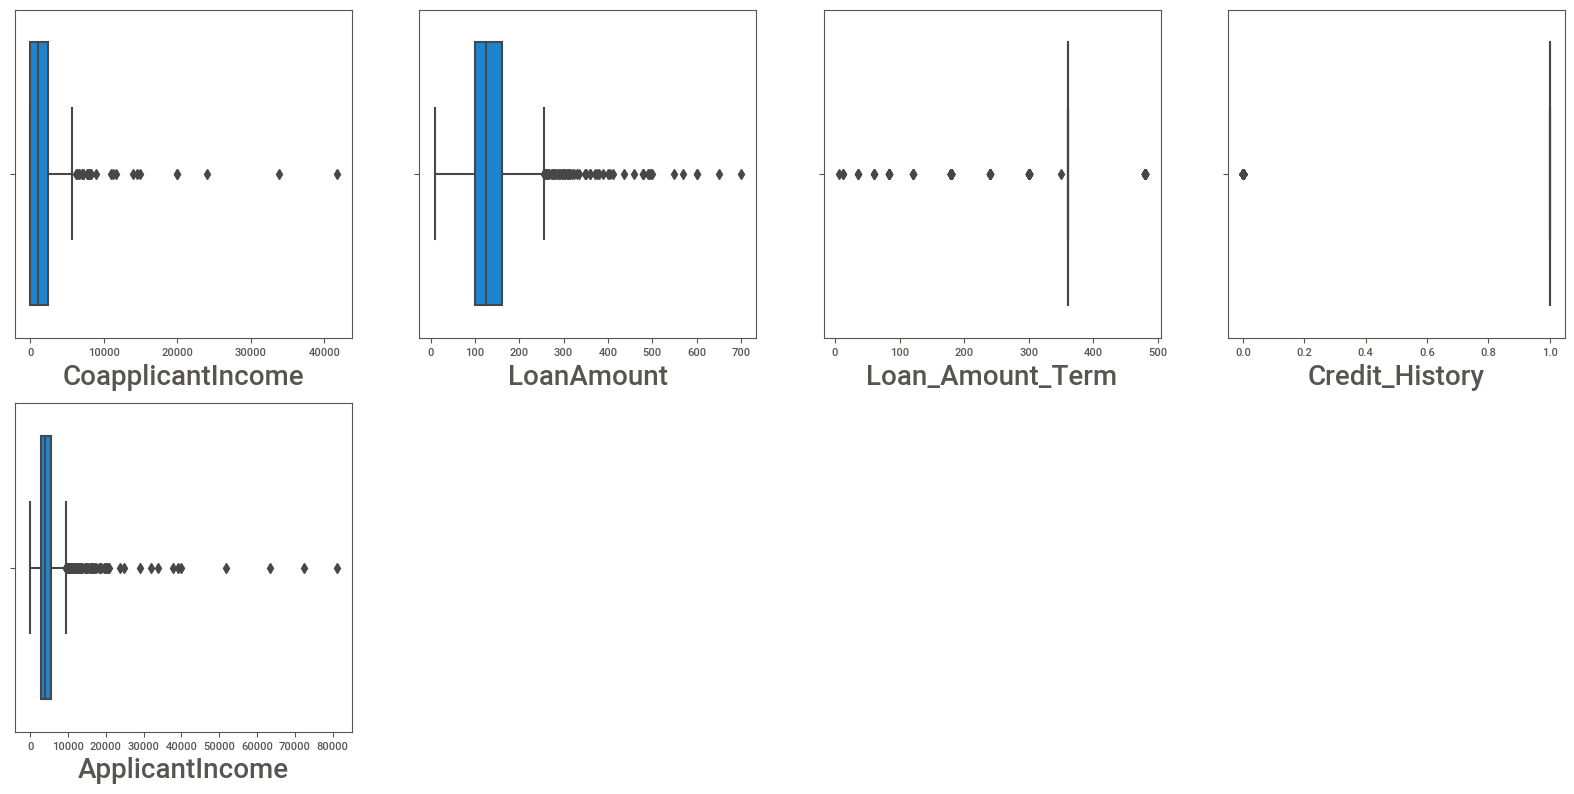

In [30]:

plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in d1:
    if plotnumber<=16 :  
        ax = plt.subplot(4,4,plotnumber)
        sns.boxplot(x=d1[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [31]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [32]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

## Data Preprocessing 

In [33]:
## Checking missing valuea

df.isnull().sum()

index                  0
Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [34]:
## Getting the rows where values are missed in Gender features
df.loc[df['Gender'].isnull()==True]

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
23,23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [35]:
df.columns

Index(['index', 'Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [36]:
## Checking the distribution along the both labels
train.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [37]:
#data.Gender=pd.get_dummies(data.Gender,drop_first=True)

#### Train

In [38]:
#Impute  numerical with median
#train.loc[train['LoanAmount'].isnull()==True,'LoanAmount']=np.median(train.LoanAmount.dropna(axis=0))
train['LoanAmount']  = train['LoanAmount'].fillna(train['LoanAmount'].median())
train['Loan_Amount_Term']  = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median())
train['Credit_History']  = train['Credit_History'].fillna(train['Credit_History'].median())

In [39]:
#Impute categorical
train.loc[train['Gender'].isnull()==True,'Gender']='Male'
train.loc[train['Married'].isnull()==True,'Married']='Yes'
train.loc[train['Self_Employed'].isnull()==True,'Self_Employed']='No'
train.loc[train['Dependents'].isnull()==True,'Dependents']='0'
train.loc[train['Education'].isnull()==True,'Education']='Graduate'

In [40]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [41]:
#categorical->numerical
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
train.Gender=lc.fit_transform(train.Gender)
train.Married=lc.fit_transform(train.Married)
train.Self_Employed=lc.fit_transform(train.Self_Employed)
train.Dependents=lc.fit_transform(train.Dependents)
train.Loan_Status=lc.fit_transform(train.Loan_Status)
train.Education=lc.fit_transform(train.Education)
train.Property_Area=lc.fit_transform(train.Property_Area)

In [42]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


#### Handling the outliers

In [43]:
 ##Handling the outliers
train.ApplicantIncome.value_counts()
    # Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(train.ApplicantIncome, interpolation = 'midpoint') 

IQR
    ## min and max limit calculation
    # First quartile (Q1) 
Q1 =train.ApplicantIncome.quantile(0.25)
    # Third quartile (Q3) 
Q3 =train.ApplicantIncome.quantile(0.75)
    ##getting the limits
min_limit=Q1 - 1.5*IQR

 max_limit=Q3 +1.5*IQR

In [44]:
print('min: ' ,min_limit)
print('max: ' ,max_limit)

min:  -1489.0
max:  10161.5


In [45]:
train.loc[train['ApplicantIncome'] >=max_limit]


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0
34,LP001100,1,0,3,0,0,12500,3000.0,320.0,360.0,1.0,0,0
54,LP001186,0,1,1,0,1,11500,0.0,286.0,360.0,0.0,2,0
67,LP001233,1,1,1,0,0,10750,0.0,312.0,360.0,1.0,2,1
102,LP001350,1,1,0,0,0,13650,0.0,128.0,360.0,1.0,2,1
106,LP001369,1,1,2,0,0,11417,1126.0,225.0,360.0,1.0,2,1
115,LP001401,1,1,1,0,0,14583,0.0,185.0,180.0,1.0,0,1
119,LP001422,0,0,0,0,0,10408,0.0,259.0,360.0,1.0,2,1
126,LP001448,1,1,3,0,0,23803,0.0,370.0,360.0,1.0,0,1
128,LP001451,1,1,1,0,1,10513,3850.0,160.0,180.0,0.0,2,0


In [46]:
train.loc[train['ApplicantIncome'] <=min_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [47]:
train.loc[train['ApplicantIncome'] > max_limit,'ApplicantIncome']=np.median(train.ApplicantIncome)
#train.loc[train['ApplicantIncome'] <= min_limit,'ApplicantIncome']=np.median(train.ApplicantIncome)

C:\Users\Emmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


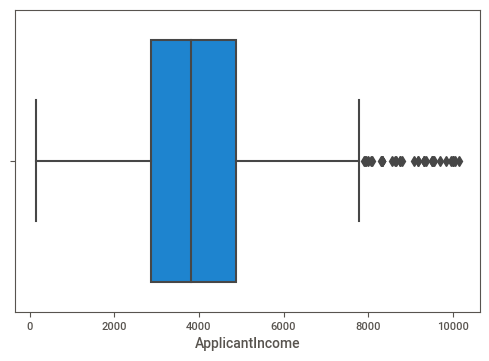

In [48]:
sns.boxplot(train.ApplicantIncome)
plt.show()

In [49]:
 ##Handling the outliers
train.CoapplicantIncome.value_counts()
    # Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(train.CoapplicantIncome, interpolation = 'midpoint') 

IQR
    ## min and max limit calculation
    # First quartile (Q1) 
Q1 =train.CoapplicantIncome.quantile(0.25)
    # Third quartile (Q3) 
Q3 =train.CoapplicantIncome.quantile(0.75)
    ##getting the limits
min_limit=Q1 - 1.5*IQR

 max_limit=Q3 +1.5*IQR

In [50]:
print('min: ' ,min_limit)
print('max: ' ,max_limit)

min:  -3438.75
max:  5736.0


In [51]:
train.loc[train['CoapplicantIncome'] >=max_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
9,LP001020,1,1,1,0,0,3812.5,10968.0,349.0,360.0,1.0,1,0
12,LP001028,1,1,2,0,0,3073.0,8106.0,200.0,360.0,1.0,2,1
38,LP001114,1,0,0,0,0,4166.0,7210.0,184.0,360.0,1.0,2,1
122,LP001431,0,0,0,0,0,2137.0,8980.0,137.0,360.0,0.0,1,1
135,LP001488,1,1,3,0,0,4000.0,7750.0,290.0,360.0,1.0,1,0
177,LP001610,1,1,3,0,0,5516.0,11300.0,495.0,360.0,0.0,1,0
180,LP001633,1,1,1,0,0,6400.0,7250.0,180.0,360.0,0.0,2,0
253,LP001843,1,1,1,1,0,2661.0,7101.0,279.0,180.0,1.0,1,1
349,LP002138,1,1,0,0,0,2625.0,6250.0,187.0,360.0,1.0,0,1
372,LP002201,1,1,2,0,1,9323.0,7873.0,380.0,300.0,1.0,0,1


In [52]:
train.loc[train['CoapplicantIncome'] <=min_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [53]:
train.loc[train['CoapplicantIncome'] > max_limit,'CoapplicantIncome']=np.median(train.CoapplicantIncome)
#train.loc[train['CoapplicantIncome'] <= min_limit,'CoapplicantIncome']=np.median(train.CoapplicantIncome)

C:\Users\Emmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


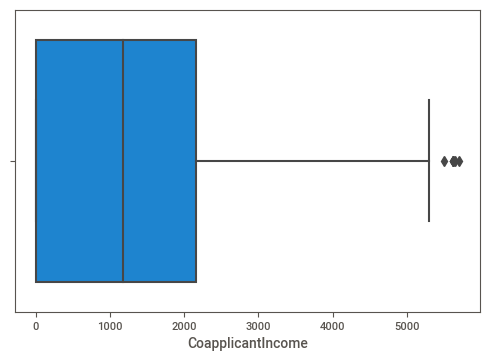

In [54]:
sns.boxplot(train.CoapplicantIncome)
plt.show()

#### Test

In [55]:
#Impute  numerical with median
#train.loc[train['LoanAmount'].isnull()==True,'LoanAmount']=np.median(train.LoanAmount.dropna(axis=0))
test['LoanAmount']  = test['LoanAmount'].fillna(test['LoanAmount'].median())
test['Loan_Amount_Term']  = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median())
test['Credit_History']  = test['Credit_History'].fillna(test['Credit_History'].median())

In [56]:
#Impute categorical
test.loc[test['Gender'].isnull()==True,'Gender']='Male'
test.loc[test['Married'].isnull()==True,'Married']='Yes'
test.loc[test['Self_Employed'].isnull()==True,'Self_Employed']='No'
test.loc[test['Dependents'].isnull()==True,'Dependents']='0'
test.loc[test['Education'].isnull()==True,'Education']='Graduate'

In [57]:
#categorical->numerical
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
test.Gender=lc.fit_transform(test.Gender)
test.Married=lc.fit_transform(test.Married)
test.Self_Employed=lc.fit_transform(test.Self_Employed)
test.Dependents=lc.fit_transform(test.Dependents)

test.Education=lc.fit_transform(test.Education)
test.Property_Area=lc.fit_transform(test.Property_Area)

In [58]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
363,LP002975,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
364,LP002980,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1
365,LP002986,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


#### Handling the outliers

In [59]:
 ##Handling the outliers
test.CoapplicantIncome.value_counts()
    # Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(test.CoapplicantIncome, interpolation = 'midpoint') 

IQR
    ## min and max limit calculation
    # First quartile (Q1) 
Q1 =test.CoapplicantIncome.quantile(0.25)
    # Third quartile (Q3) 
Q3 =test.CoapplicantIncome.quantile(0.75)
    ##getting the limits
min_limit=Q1 - 1.5*IQR

 max_limit=Q3 +1.5*IQR

In [60]:
print('min: ' ,min_limit)
print('max: ' ,max_limit)

min:  -3645.75
max:  6076.25


In [61]:
test.loc[test['CoapplicantIncome'] >=max_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
18,LP001108,1,1,0,0,0,9226,7916,300.0,360.0,1.0,2
25,LP001153,1,0,0,0,0,0,24000,148.0,360.0,0.0,0
85,LP001452,1,1,2,0,0,4635,8000,102.0,180.0,1.0,0
123,LP001652,1,0,0,0,0,2500,6414,187.0,360.0,0.0,0
230,LP002294,1,0,0,0,0,14911,14507,130.0,360.0,1.0,1
237,LP002325,1,1,2,1,0,6166,13983,102.0,360.0,1.0,0
284,LP002570,0,1,2,0,0,10000,11666,460.0,360.0,1.0,2
351,LP002901,1,0,0,0,0,2283,15000,106.0,360.0,1.0,0


In [62]:
test.loc[test['CoapplicantIncome'] <=min_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


In [63]:
test.loc[test['CoapplicantIncome'] > max_limit,'CoapplicantIncome']=np.median(test.CoapplicantIncome)
#test.loc[test['CoapplicantIncome'] <= min_limit,'CoapplicantIncome']=np.median(test.CoapplicantIncome)

C:\Users\Emmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


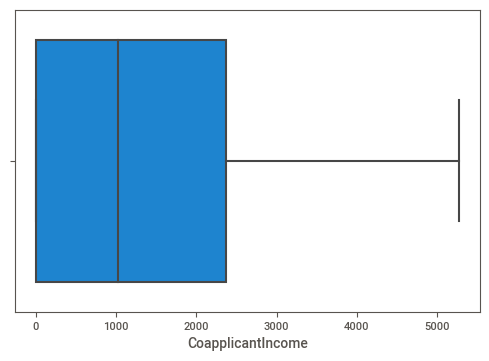

In [64]:
sns.boxplot(test.CoapplicantIncome)
plt.show()

In [65]:
 ##Handling the outliers
test.ApplicantIncome.value_counts()
    # Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(test.ApplicantIncome, interpolation = 'midpoint') 

IQR
    ## min and max limit calculation
    # First quartile (Q1) 
Q1 =test.ApplicantIncome.quantile(0.25)
    # Third quartile (Q3) 
Q3 =test.ApplicantIncome.quantile(0.75)
    ##getting the limits
min_limit=Q1 - 1.5*IQR

 max_limit=Q3 +1.5*IQR

In [66]:
print('min: ' ,min_limit)
print('max: ' ,max_limit)

min:  -430.0
max:  8354.0


In [67]:
test.loc[test['ApplicantIncome'] >=max_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
8,LP001059,1,1,2,0,0,13633,0.0,280.0,240.0,1.0,2
13,LP001094,1,1,2,0,0,12173,0.0,166.0,360.0,0.0,1
18,LP001108,1,1,0,0,0,9226,1025.0,300.0,360.0,1.0,2
81,LP001428,1,1,3,0,0,72529,0.0,360.0,360.0,1.0,2
83,LP001446,1,1,0,0,0,8449,0.0,257.0,360.0,1.0,0
91,LP001483,1,1,3,0,0,13518,0.0,390.0,360.0,1.0,0
98,LP001517,1,1,3,0,0,9719,0.0,61.0,360.0,1.0,2
124,LP001655,0,0,0,0,0,12500,0.0,300.0,360.0,0.0,2
143,LP001791,1,1,0,0,1,32000,0.0,550.0,360.0,1.0,1
144,LP001794,1,1,2,0,1,10890,0.0,260.0,12.0,1.0,0


In [68]:
test.loc[test['ApplicantIncome'] <=min_limit]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area


In [69]:
test.loc[test['ApplicantIncome'] > max_limit,'ApplicantIncome']=np.median(test.ApplicantIncome)
#test.loc[test['ApplicantIncome'] <= min_limit,'ApplicantIncome']=np.median(test.ApplicantIncome)

C:\Users\Emmal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


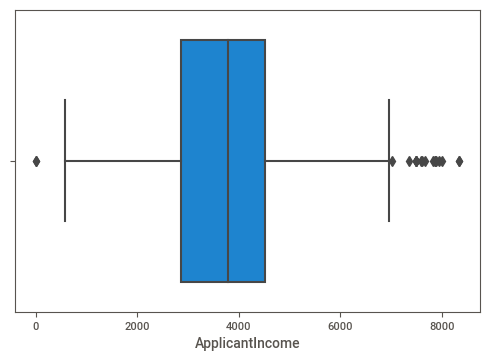

In [70]:
sns.boxplot(test.ApplicantIncome)
plt.show()

In [71]:
train1= train.drop(['Loan_ID'],axis=1) ## Droping unique attribute
train1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


In [72]:
test1= test.drop(['Loan_ID'],axis=1) ## Droping unique attribute
test1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720.0,0.0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076.0,1500.0,126.0,360.0,1.0,2
2,1,1,2,0,0,5000.0,1800.0,208.0,360.0,1.0,2
3,1,1,2,0,0,2340.0,2546.0,100.0,360.0,1.0,2
4,1,0,0,1,0,3276.0,0.0,78.0,360.0,1.0,2


## Feature Selection

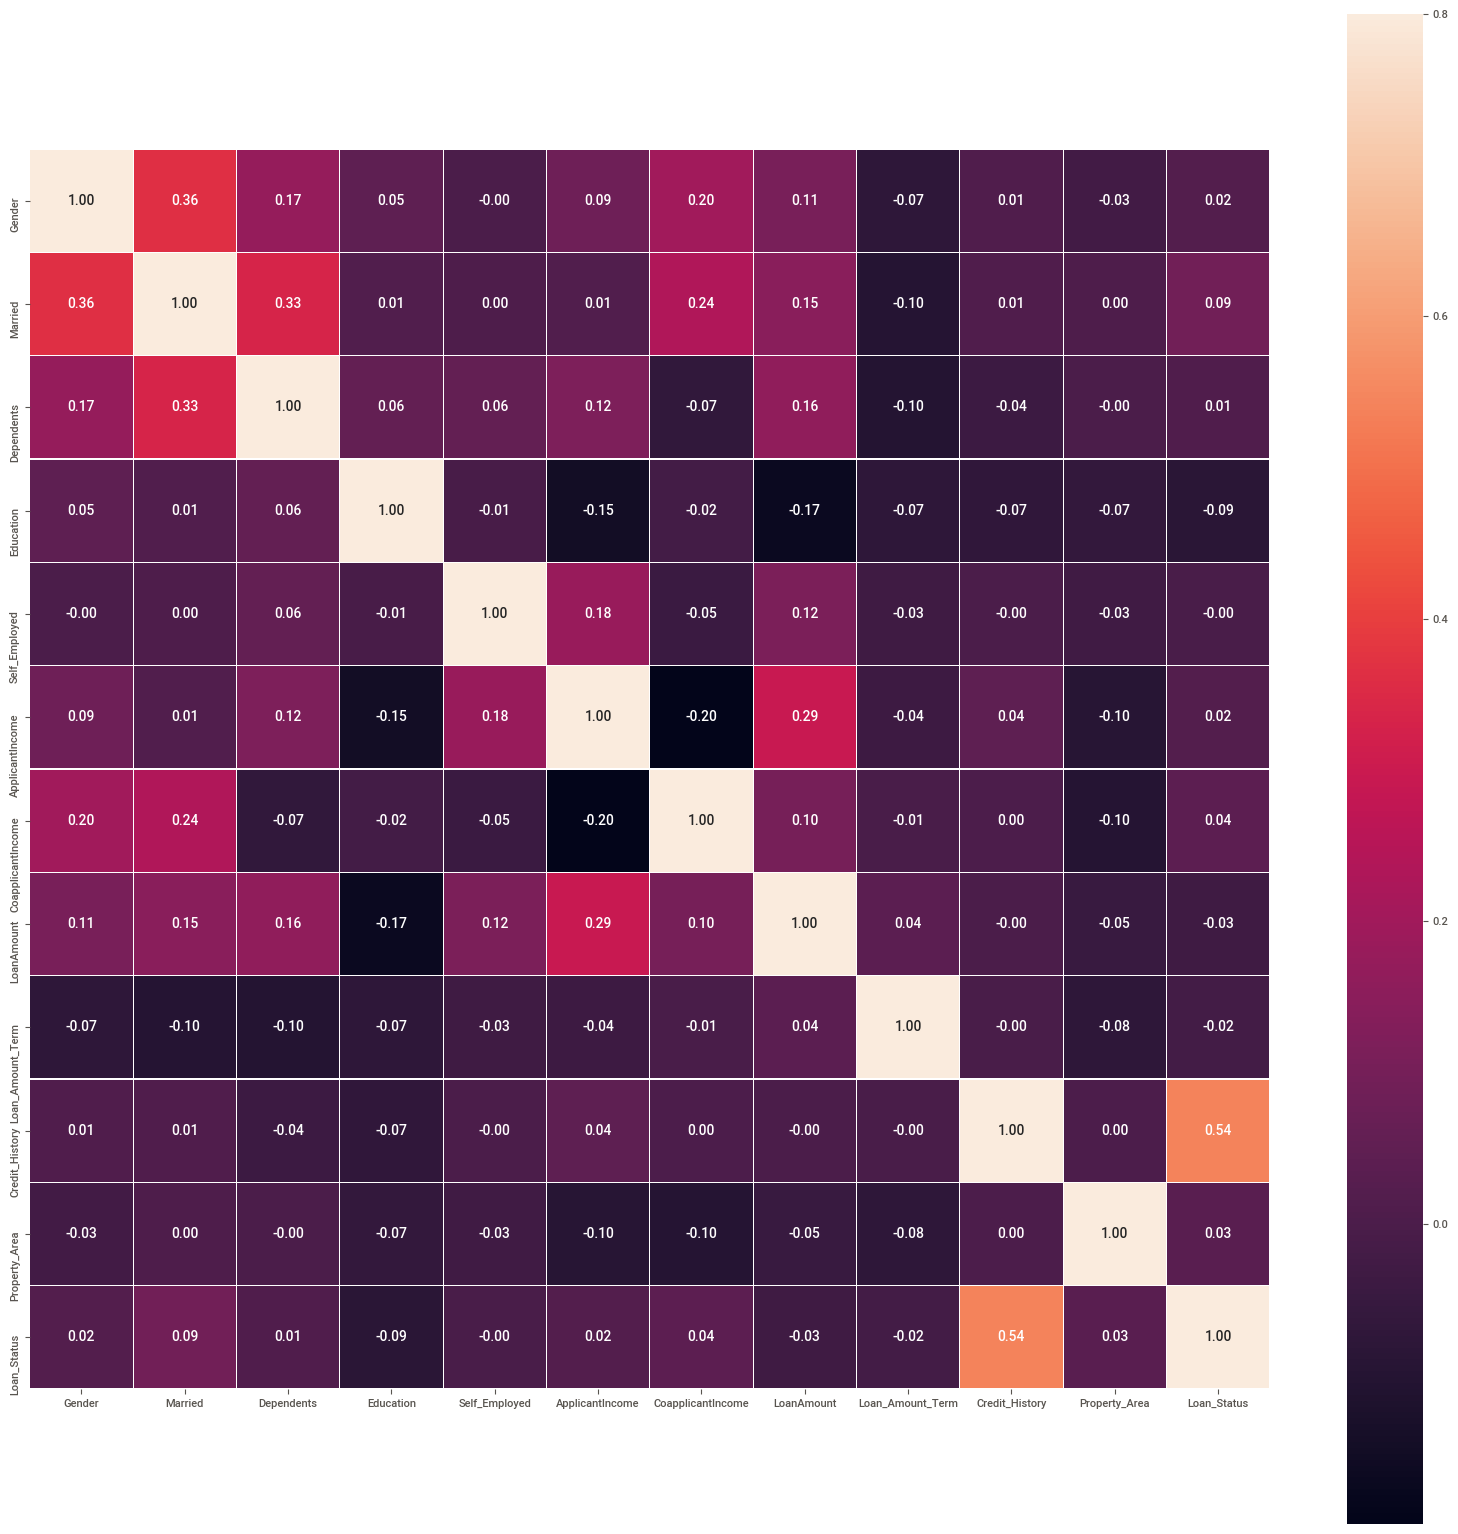

In [73]:
#check correlation
plt.figure(figsize=(20, 20))
ax = sns.heatmap(train1.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)

These features are not highly correlated

In [74]:
train1.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,4099.298046,1286.179023,145.752443,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,1848.706334,1440.204497,84.107233,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.250000,1177.750000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,4880.000000,2159.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,10139.000000,5701.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [75]:
train1.duplicated().sum()

0

In [76]:
test1.duplicated().sum()#train dataset will be spilt to X and y

1

In [77]:
#test1.drop_duplicates(inplace=True)

In [78]:
test.shape

(367, 12)

## Model Creation

In [79]:
## Defining X and y and creating dependent and independent variables
X = train1.drop(columns = ['Loan_Status']) ## independent variable
y = train1['Loan_Status'] ## Dependent or target variable"

In [80]:
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()## objet creation
X_scaled = scalar.fit_transform(X)

In [81]:
## Balacing the data
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
print(Counter(y))
X_sm,y_sm=sm.fit_resample(X_scaled,y)
print(Counter(y_sm))

Counter({1: 422, 0: 192})
Counter({1: 422, 0: 422})


In [82]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_sm,y_sm, test_size= 0.3,random_state=0)

### The following models will be built :
* Logistic Regression
* KNN 
* Decision Tree
* Random Forest 
* XGBoost
* Naive Bayes
* SVM
* Gradient Boosting

## Logistic Regression Model

In [83]:
from sklearn.linear_model import LogisticRegression
modellr = LogisticRegression()## object Creation

modellr.fit(x_train,y_train)## fitting the model with training data

LogisticRegression()

In [84]:
y_pred = modellr.predict(x_test)

In [85]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.46      0.59       127
           1       0.63      0.91      0.74       127

    accuracy                           0.69       254
   macro avg       0.73      0.69      0.67       254
weighted avg       0.73      0.69      0.67       254



In [86]:
y_pred_train=modellr.predict(x_train)

In [87]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_pred_train))
print("Test accuracy :",accuracy_score(y_test,y_pred))

Train accuracy : 0.7067796610169491
Test accuracy : 0.6850393700787402


In [88]:
## for logestic regression model
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,y_pred)
score

0.6850393700787402

In [89]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modellr,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.78359133 0.7        0.7045177  0.79304029 0.7052005 ]
Cross validation Score: 0.737269966016096
Std : 0.04182394009558197


C:\Users\Emmal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Emmal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

#### Hyperparameter Tuning

In [90]:
from sklearn.linear_model import LogisticRegression
modellr1 = LogisticRegression(
    
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    
    random_state=1,
    solver='liblinear',
    max_iter=100,
    
    verbose=0,
   
    n_jobs=1,tol=0.0001,warm_start=False
    
                             )## object Creation

modellr1.fit(x_train,y_train)## fitting the model with training data

LogisticRegression(n_jobs=1, random_state=1, solver='liblinear')

In [91]:
y_predlr1 = modellr1.predict(x_test)

In [92]:
from sklearn.metrics import accuracy_score,classification_report,f1_score
print(classification_report(y_test,y_predlr1))

              precision    recall  f1-score   support

           0       0.84      0.46      0.59       127
           1       0.63      0.91      0.74       127

    accuracy                           0.69       254
   macro avg       0.73      0.69      0.67       254
weighted avg       0.73      0.69      0.67       254



In [93]:
y_pred_train1=modellr1.predict(x_train)

In [94]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_pred_train1))
print("Test accuracy :",accuracy_score(y_test,y_predlr1))

Train accuracy : 0.7067796610169491
Test accuracy : 0.6850393700787402


In [95]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modellr1,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.75077399 0.70835913 0.70115995 0.81257631 0.69799499]
Cross validation Score: 0.7341728756279841
Std : 0.04356084968328615


## KNN Model

In [96]:
### creating 2nd model
from sklearn.neighbors import KNeighborsClassifier
modelknn= KNeighborsClassifier()
modelknn.fit(x_train,y_train)
y_hatknn=modelknn.predict(x_test)

In [97]:
#compre classification with knn model

In [98]:
## for KNN model
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,y_hatknn)
score

0.7716535433070866

In [99]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelknn,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.53111455 0.51826625 0.50564713 0.49252137 0.54495614]
Cross validation Score: 0.5185010886945871
Std : 0.018434719898575393


In [100]:
error_rate=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

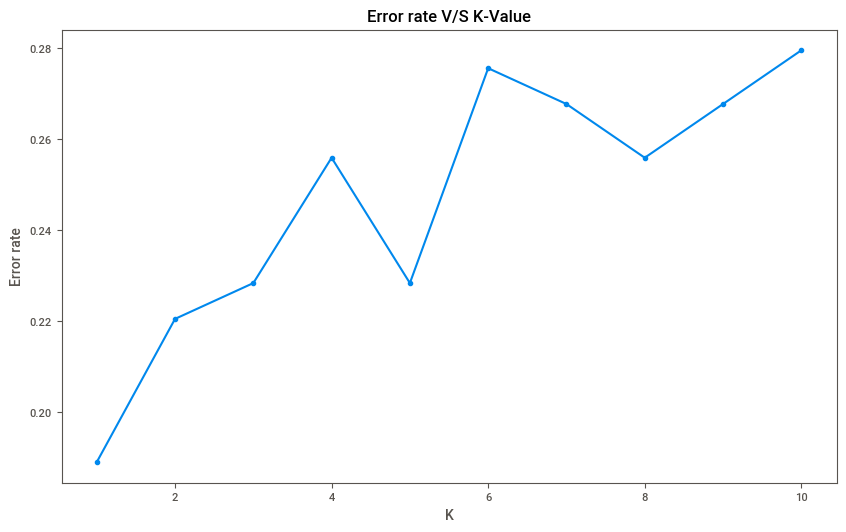

In [101]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,marker='o')
plt.title('Error rate V/S K-Value')
plt.xlabel('K')
plt.ylabel('Error rate')

In [102]:
knn1=KNeighborsClassifier(n_neighbors=3)
knn1.fit(x_train,y_train)
y_hatknn1=knn1.predict(x_test)

In [103]:
print(classification_report(y_test,y_hatknn1))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77       127
           1       0.77      0.77      0.77       127

    accuracy                           0.77       254
   macro avg       0.77      0.77      0.77       254
weighted avg       0.77      0.77      0.77       254



In [104]:
y_pred_trainknn=knn1.predict(x_train)

In [105]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_pred_trainknn))
print("Test accuracy :",accuracy_score(y_test,y_hatknn1))

Train accuracy : 0.8915254237288136
Test accuracy : 0.7716535433070866


## Decision Tree Model

In [106]:
from sklearn.tree import DecisionTreeClassifier
modeldt=DecisionTreeClassifier()
modeldt.fit(x_train,y_train)
y_hatdt=modeldt.predict(x_test)

In [107]:
print(classification_report(y_test,y_hatdt))

              precision    recall  f1-score   support

           0       0.77      0.72      0.75       127
           1       0.74      0.79      0.76       127

    accuracy                           0.76       254
   macro avg       0.76      0.76      0.76       254
weighted avg       0.76      0.76      0.76       254



In [108]:
y_pred_traindt=modeldt.predict(x_train)

In [109]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_pred_traindt))
print("Test accuracy :",accuracy_score(y_test,y_hatdt))

Train accuracy : 1.0
Test accuracy : 0.7559055118110236


In [110]:
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,y_hatdt)
score

0.7559055118110236

In [111]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modeldt,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good. 

[0.68219814 0.59566563 0.64239927 0.7202381  0.6547619 ]
Cross validation Score: 0.6590526088978101
Std : 0.04145607768872518


In [112]:
from sklearn.model_selection import RandomizedSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}



modeldt1 = DecisionTreeClassifier(random_state=3)# createempty model

modeldt1_cv = RandomizedSearchCV(modeldt1,params,scoring='f1', n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
#n_iter-->100 times to buld  new model
modeldt1_cv.fit(x_train, y_train)
modeldt1_best_params = modeldt1_cv.best_params_
print(f"Best paramters: {modeldt1_best_params}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'splitter': 'best', 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_depth': 3, 'criterion': 'entropy'}


In [113]:
modeldt2=DecisionTreeClassifier(criterion='entropy',max_depth=3,
                                min_samples_leaf=6,min_samples_split=3,
                                splitter='best')

In [114]:
modeldt2.fit(x_train,y_train)
y_hatdt2=modeldt2.predict(x_test)    

In [115]:
print(classification_report(y_test,y_hatdt2))

              precision    recall  f1-score   support

           0       0.97      0.44      0.61       127
           1       0.64      0.98      0.77       127

    accuracy                           0.71       254
   macro avg       0.80      0.71      0.69       254
weighted avg       0.80      0.71      0.69       254



In [116]:
y_pred_traindt2=modeldt2.predict(x_train)

In [117]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_pred_traindt2))
print("Test accuracy :",accuracy_score(y_test,y_hatdt2))

Train accuracy : 0.7271186440677966
Test accuracy : 0.7125984251968503


## Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier

modelrf = RandomForestClassifier(n_estimators=100)
modelrf.fit(x_train,y_train)
y_predrf=modelrf.predict(x_test)


In [119]:
pd.crosstab(y_test,y_predrf)

col_0,0,1
Loan_Status,,
0,95,32
1,14,113


In [120]:
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
print(classification_report(y_test,y_predrf))

              precision    recall  f1-score   support

           0       0.87      0.75      0.81       127
           1       0.78      0.89      0.83       127

    accuracy                           0.82       254
   macro avg       0.83      0.82      0.82       254
weighted avg       0.83      0.82      0.82       254



In [121]:
y_pred_trainrf=modelrf.predict(x_train)

In [122]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_pred_trainrf))
print("Test accuracy :",accuracy_score(y_test,y_predrf))

Train accuracy : 1.0
Test accuracy : 0.8188976377952756


In [123]:
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,y_predrf)
score

0.8188976377952756

In [124]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelrf,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.77755418 0.73637771 0.78174603 0.80769231 0.75266291]
Cross validation Score: 0.7712066270502802
Std : 0.024655621848251905


#### Hyperparameter Tuning 

In [125]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]#optimal value
min_samples_leaf = [1,2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

modelrf1 = RandomForestClassifier(random_state=42)# createempty model

modelrf1_cv = RandomizedSearchCV(estimator=modelrf1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)
#n_iter-->100 times to buld  new model
modelrf1_cv.fit(x_train, y_train)
modelrf1_best_params = modelrf1_cv.best_params_
print(f"Best paramters: {modelrf1_best_params}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': False}


In [172]:
#modelrf1_cv.best_params_

In [170]:
modelrf1_cv.best_score_

0.8093567251461988

In [126]:
modelrf2 = RandomForestClassifier(n_estimators=600,min_samples_split=2,min_samples_leaf=2,max_features='sqrt', 
                                  max_depth=110,bootstrap=False)


In [127]:
modelrf2.fit(x_train, y_train)
y_predrf2=modelrf2.predict(x_test)

In [128]:
print(classification_report(y_test,y_predrf2))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82       127
           1       0.79      0.92      0.85       127

    accuracy                           0.83       254
   macro avg       0.84      0.83      0.83       254
weighted avg       0.84      0.83      0.83       254



In [129]:
y_pred_trainrf2=modelrf2.predict(x_train)

In [130]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_pred_trainrf2))
print("Test accuracy :",accuracy_score(y_test,y_predrf2))

Train accuracy : 0.9983050847457627
Test accuracy : 0.8346456692913385


## XGB model

In [131]:
from xgboost import XGBClassifier
modelxgb=XGBClassifier(n_estimators=50,max_depth=4)
modelxgb.fit(x_train,y_train)
y_hatxgb=modelxgb.predict(x_test)

[11:29:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Emmal\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [132]:
acc=accuracy_score(y_test,y_hatxgb)
acc

0.7637795275590551

In [133]:
pd.crosstab(y_test,y_hatxgb)

col_0,0,1
Loan_Status,,
0,88,39
1,21,106


In [134]:
print(classification_report(y_test,y_hatxgb))

              precision    recall  f1-score   support

           0       0.81      0.69      0.75       127
           1       0.73      0.83      0.78       127

    accuracy                           0.76       254
   macro avg       0.77      0.76      0.76       254
weighted avg       0.77      0.76      0.76       254



In [135]:
y_pred_trainxgb=modelxgb.predict(x_train)

In [136]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_pred_trainxgb))
print("Test accuracy :",accuracy_score(y_test,y_hatxgb))

Train accuracy : 0.9694915254237289
Test accuracy : 0.7637795275590551


In [137]:
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,y_hatxgb)
score

0.7637795275590551

In [138]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelxgb,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[11:29:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Emmal\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Emmal\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Emmal\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of 

[11:29:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:29:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:29:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Emmal\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Emmal\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:29:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.77770898 0.72074303 0.74847375 0.79151404 0.72243108]
Cross validation Score: 0.7521741760131854
Std : 0.02858640548661607


## Naive Bayes Model

In [139]:
from sklearn.naive_bayes import GaussianNB
modelnb=GaussianNB(var_smoothing=0.01)
modelnb.fit(x_train,y_train)
y_prednb=modelnb.predict(x_test)

In [140]:
print(classification_report(y_test,y_prednb))

              precision    recall  f1-score   support

           0       0.96      0.39      0.55       127
           1       0.62      0.98      0.76       127

    accuracy                           0.69       254
   macro avg       0.79      0.69      0.65       254
weighted avg       0.79      0.69      0.65       254



In [141]:
y_pred_trainnb=modelnb.predict(x_train)

In [142]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_pred_trainnb))
print("Test accuracy :",accuracy_score(y_test,y_prednb))

Train accuracy : 0.7
Test accuracy : 0.6850393700787402


In [143]:
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,y_prednb)
score

0.6850393700787402

In [144]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelnb,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.46346749 0.48575851 0.51923077 0.4465812  0.50031328]
Cross validation Score: 0.48307025104238727
Std : 0.025798648176329694


## SVM Model

In [145]:
from sklearn.svm import SVC
modelsvc=SVC()
modelsvc.fit(x_train,y_train)
y_predsvc=modelsvc.predict(x_test)

In [146]:
from sklearn.metrics import accuracy_score,auc, confusion_matrix,precision_score,recall_score,f1_score,classification_report
print(classification_report(y_test,y_predsvc))

              precision    recall  f1-score   support

           0       0.82      0.63      0.71       127
           1       0.70      0.86      0.77       127

    accuracy                           0.74       254
   macro avg       0.76      0.74      0.74       254
weighted avg       0.76      0.74      0.74       254



In [147]:
y_pred_trainsvc=modelsvc.predict(x_train)

In [148]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_pred_trainsvc))
print("Test accuracy :",accuracy_score(y_test,y_predsvc))

Train accuracy : 0.7966101694915254
Test accuracy : 0.7440944881889764


In [149]:
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,y_predsvc)
score

0.7440944881889764

In [150]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelsvc,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.53034056 0.58978328 0.55708181 0.53296703 0.53320802]
Cross validation Score: 0.5486761398216506
Std : 0.022727449100199727


In [151]:
modelsvc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## Gradiant Boosting Classifier Model

In [163]:

from sklearn.ensemble import GradientBoostingClassifier
modelgbm=GradientBoostingClassifier() ## object creation
modelgbm.fit(x_train,y_train) ## fitting the data
y_predgbm=modelgbm.predict(x_test)

In [164]:
print(classification_report(y_test,y_predgbm))

              precision    recall  f1-score   support

           0       0.84      0.64      0.73       127
           1       0.71      0.88      0.79       127

    accuracy                           0.76       254
   macro avg       0.78      0.76      0.76       254
weighted avg       0.78      0.76      0.76       254



In [165]:
y_pred_traingbm=modelgbm.predict(x_train)

In [166]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Train accuracy :",accuracy_score(y_train,y_pred_traingbm))
print("Test accuracy :",accuracy_score(y_test,y_predgbm))

Train accuracy : 0.9152542372881356
Test accuracy : 0.7598425196850394


In [167]:
from sklearn.metrics import roc_auc_score
score=roc_auc_score(y_test,y_predgbm)
score

0.7598425196850394

In [168]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(modelgbm,X,y,cv=5,scoring='roc_auc')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())

[0.75448916 0.69102167 0.70421245 0.79059829 0.7089599 ]
Cross validation Score: 0.7298562960946862
Std : 0.037145018859949565
